In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import roc_auc_score, confusion_matrix
from PIL import Image

In [3]:
def norm(prob):
    '''Normalize prob into [0,1]'''
    norm_prob =  (prob - np.min(prob)) / (np.max(prob) - np.min(prob))
    
    return norm_prob


def plot_confusion_matrix(matrix):
    '''Plot Confusion Matrix'''
    percent = (matrix/matrix.sum())*100
    df_cm = pd.DataFrame(matrix, ['Non-Hateful','Hateful'], ['Non-Hateful','Hateful'])
    text = np.asarray([['True Negatives', 'False Positives'], ['False Negatives', 'True Positives']])
    label = (np.asarray(["{0}\n\n{1}\n\n{2: .2f}%".format(text,matrix,percent) for text, matrix, percent in zip(text.flatten(), matrix.flatten(), percent.flatten())])).reshape(2,2)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    sn.set(font_scale=2)
    sn.heatmap(df_cm, annot=label, annot_kws={"size": 20}, fmt ='', cmap ='Blues', ax=ax)
    
    rect = patches.Rectangle((0, 0), 2, 2, linewidth=3, edgecolor='black', fill=False)
    ax.add_patch(rect)
    
    plt.xlabel("Predicted Label", ha='center', va='center', fontsize=20, labelpad=20)
    plt.ylabel("True Label", ha='center', va='bottom', fontsize=20, labelpad=20)
    
    plt.show()

In [4]:
# load the test_seen set
test_seen = pd.read_json("../data/test_seen.jsonl", lines=True)

## Error Analysis of predicted results from CLIP baseline model

In [5]:
CLIP_baseline = pd.read_csv('CLIP_baseline.csv')

# print AUROC score
roc_auc_score(test_seen['label'], norm(CLIP_baseline['proba']))*100

81.9811924769908

### Confusion Matrix

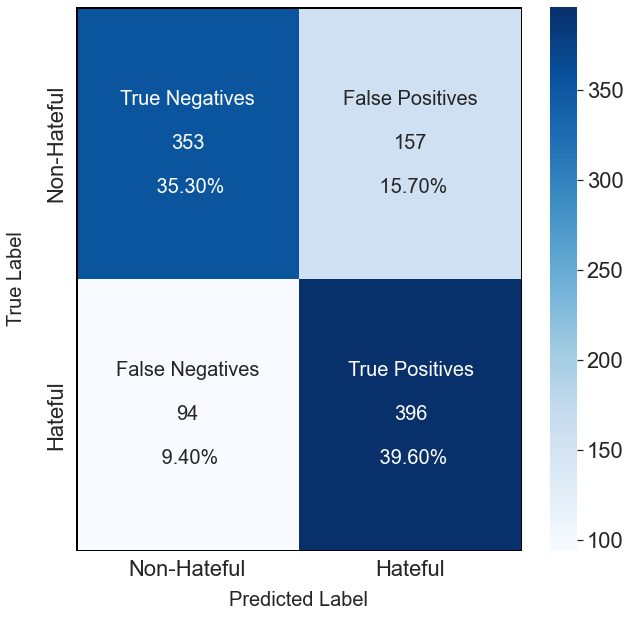

In [7]:
# plot confusion matrix
CLIP_baseline_matrix = confusion_matrix(test_seen['label'], CLIP_baseline['label'])
plot_confusion_matrix(CLIP_baseline_matrix)

### False Positive cases

In [8]:
# save all False Positive caseson-Hateful meme prediced as Hateful)
False_Positive = test_seen['label'] != CLIP_baseline['label']
False_Positive &= test_seen['label'] == 0
FP_CLIP_baseline = test_seen[False_Positive].img.values
print(FP_CLIP_baseline)

['img/49267.png' 'img/10652.png' 'img/42635.png' 'img/63502.png'
 'img/30954.png' 'img/37092.png' 'img/76542.png' 'img/07652.png'
 'img/07689.png' 'img/29710.png' 'img/90538.png' 'img/06931.png'
 'img/69403.png' 'img/03146.png' 'img/04879.png' 'img/90734.png'
 'img/50483.png' 'img/45326.png' 'img/09241.png' 'img/57431.png'
 'img/70456.png' 'img/48523.png' 'img/45093.png' 'img/89026.png'
 'img/63719.png' 'img/98035.png' 'img/28579.png' 'img/01634.png'
 'img/45610.png' 'img/91260.png' 'img/54621.png' 'img/03968.png'
 'img/26549.png' 'img/13907.png' 'img/72364.png' 'img/58069.png'
 'img/15438.png' 'img/86025.png' 'img/96502.png' 'img/17845.png'
 'img/13874.png' 'img/57312.png' 'img/62790.png' 'img/10938.png'
 'img/45827.png' 'img/79861.png' 'img/74236.png' 'img/03987.png'
 'img/80914.png' 'img/21863.png' 'img/93481.png' 'img/90143.png'
 'img/91637.png' 'img/63795.png' 'img/42986.png' 'img/41896.png'
 'img/57869.png' 'img/67951.png' 'img/98473.png' 'img/57908.png'
 'img/51628.png' 'img/014

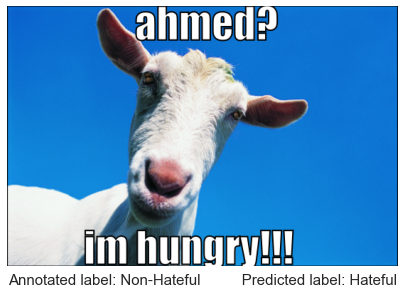

In [9]:
# display a False Positive case (Non-Hateful meme prediced as Hateful)
img = FP_CLIP_baseline[0]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0,image.size[1]+25, 'Annotated label: Non-Hateful' + '          Predicted label: Hateful', fontsize=15)
plt.imshow(image);

### False Negative cases

In [10]:
# save all False Negative cases (Hateful Meme predicted as Non-Hateful)
False_Negative = test_seen['label'] != CLIP_baseline['label']
False_Negative &= test_seen['label'] == 1
FN_CLIP_baseline = test_seen[False_Negative].img.values
print(FN_CLIP_baseline)

['img/69421.png' 'img/39867.png' 'img/38045.png' 'img/93875.png'
 'img/57286.png' 'img/08261.png' 'img/83720.png' 'img/86394.png'
 'img/17546.png' 'img/56908.png' 'img/38701.png' 'img/02789.png'
 'img/78092.png' 'img/15473.png' 'img/01284.png' 'img/27980.png'
 'img/47693.png' 'img/64735.png' 'img/05219.png' 'img/17096.png'
 'img/80713.png' 'img/08524.png' 'img/07193.png' 'img/51482.png'
 'img/82591.png' 'img/07396.png' 'img/05968.png' 'img/79316.png'
 'img/17852.png' 'img/70148.png' 'img/92837.png' 'img/26910.png'
 'img/57890.png' 'img/43269.png' 'img/34291.png' 'img/03765.png'
 'img/72419.png' 'img/80321.png' 'img/90657.png' 'img/28495.png'
 'img/42083.png' 'img/19740.png' 'img/89140.png' 'img/37845.png'
 'img/31875.png' 'img/87532.png' 'img/79243.png' 'img/56294.png'
 'img/80246.png' 'img/92658.png' 'img/60794.png' 'img/16473.png'
 'img/27408.png' 'img/32560.png' 'img/34170.png' 'img/89571.png'
 'img/68172.png' 'img/69123.png' 'img/27659.png' 'img/39658.png'
 'img/15489.png' 'img/492

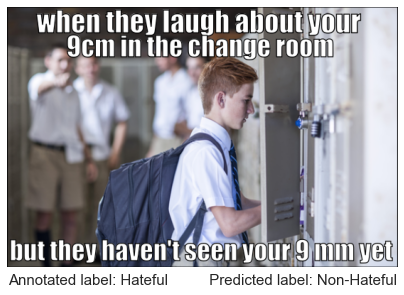

In [11]:
# display a False Negative case (Hateful Meme predicted as Non-Hateful)
img = FN_CLIP_baseline[0]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0,image.size[1]+25, 'Annotated label: Hateful' + '          Predicted label: Non-Hateful', fontsize=15)
plt.imshow(image);

## Error Analysis of predicted results from CLIP model with captioning features

In [12]:
CLIP_caption = pd.read_csv('CLIP_caption.csv')

# print AUROC score
roc_auc_score(test_seen['label'], norm(CLIP_caption['proba']))*100

82.73629451780712

### Confusion Matrix

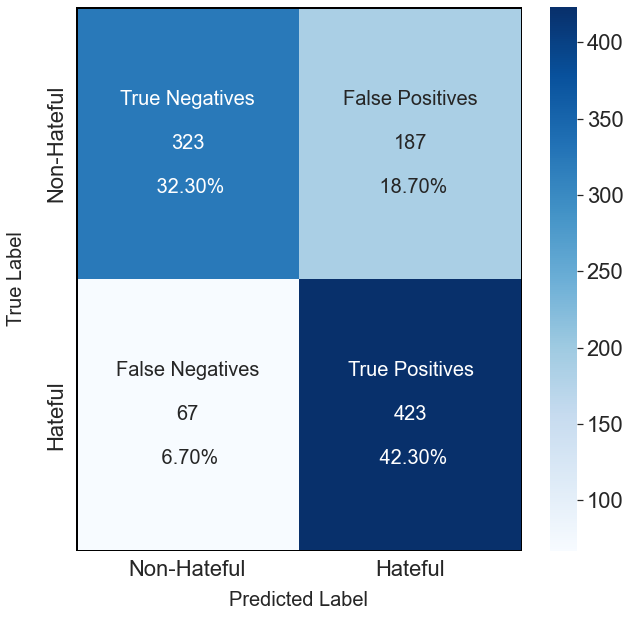

In [13]:
# plot confusion matrix
CLIP_caption_matrix = confusion_matrix(test_seen['label'], CLIP_caption['label'])
plot_confusion_matrix(CLIP_caption_matrix)

### False Positive cases

In [14]:
# save all False Positive caseson-Hateful meme prediced as Hateful)
False_Positive = test_seen['label'] != CLIP_caption['label']
False_Positive &= test_seen['label'] == 0
FP_CLIP_caption = test_seen[False_Positive].img.values
print(FP_CLIP_caption)

['img/70691.png' 'img/52971.png' 'img/49267.png' 'img/42635.png'
 'img/63502.png' 'img/30954.png' 'img/37092.png' 'img/76542.png'
 'img/07652.png' 'img/07689.png' 'img/29710.png' 'img/90538.png'
 'img/06931.png' 'img/69403.png' 'img/03146.png' 'img/04879.png'
 'img/31894.png' 'img/45326.png' 'img/09241.png' 'img/31468.png'
 'img/57431.png' 'img/70456.png' 'img/48523.png' 'img/45093.png'
 'img/94152.png' 'img/63719.png' 'img/98035.png' 'img/28579.png'
 'img/01634.png' 'img/75806.png' 'img/45610.png' 'img/91260.png'
 'img/95371.png' 'img/03968.png' 'img/26549.png' 'img/72364.png'
 'img/58069.png' 'img/15438.png' 'img/86025.png' 'img/96502.png'
 'img/17845.png' 'img/13874.png' 'img/57312.png' 'img/62790.png'
 'img/45827.png' 'img/79861.png' 'img/74236.png' 'img/03987.png'
 'img/80914.png' 'img/09687.png' 'img/21863.png' 'img/06329.png'
 'img/02751.png' 'img/39247.png' 'img/93481.png' 'img/90143.png'
 'img/62719.png' 'img/05792.png' 'img/79134.png' 'img/59028.png'
 'img/63795.png' 'img/429

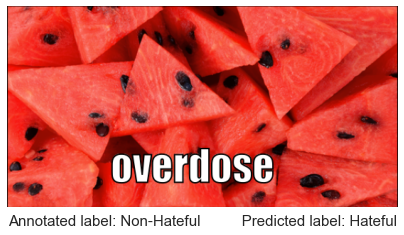

In [15]:
# display a False Positive cases (Non-Hateful meme prediced as Hateful)
img = FP_CLIP_caption[0]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0,image.size[1]+25, 'Annotated label: Non-Hateful' + '          Predicted label: Hateful', fontsize=15)
plt.imshow(image);

### False Negative cases

In [16]:
# save all False Negative cases (Hateful Meme predicted as Non-Hateful)
False_Negative = test_seen['label'] != CLIP_caption['label']
False_Negative &= test_seen['label'] == 1
FN_CLIP_caption = test_seen[False_Negative].img.values
print(FN_CLIP_caption)

['img/69421.png' 'img/43728.png' 'img/93875.png' 'img/57286.png'
 'img/17546.png' 'img/56908.png' 'img/38701.png' 'img/12643.png'
 'img/02789.png' 'img/78092.png' 'img/15473.png' 'img/27980.png'
 'img/64735.png' 'img/10963.png' 'img/17096.png' 'img/80713.png'
 'img/08524.png' 'img/07193.png' 'img/51482.png' 'img/79316.png'
 'img/17852.png' 'img/92837.png' 'img/26910.png' 'img/57890.png'
 'img/34291.png' 'img/84057.png' 'img/03765.png' 'img/72419.png'
 'img/27548.png' 'img/42083.png' 'img/37845.png' 'img/31875.png'
 'img/80246.png' 'img/92658.png' 'img/16473.png' 'img/34170.png'
 'img/89571.png' 'img/68172.png' 'img/69123.png' 'img/15489.png'
 'img/49215.png' 'img/92015.png' 'img/23897.png' 'img/05846.png'
 'img/64813.png' 'img/31042.png' 'img/52401.png' 'img/78206.png'
 'img/20781.png' 'img/65078.png' 'img/56184.png' 'img/31470.png'
 'img/06927.png' 'img/59031.png' 'img/92783.png' 'img/53942.png'
 'img/21497.png' 'img/49176.png' 'img/67350.png' 'img/62085.png'
 'img/68230.png' 'img/319

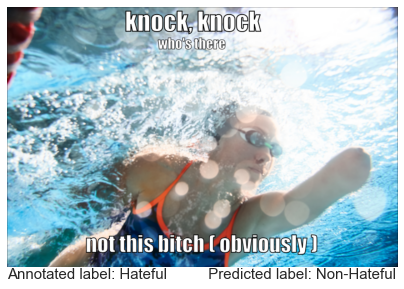

In [17]:
# display a False Negative case (Hateful Meme predicted as Non-Hateful)
img = FN_CLIP_caption[6]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0,image.size[1]+25, 'Annotated label: Hateful' + '          Predicted label: Non-Hateful', fontsize=15)
plt.imshow(image);

### Comparison: True Positive cases identified by CLIP model with captioning features but not identified by CLIP baseline model

In [18]:
True_Positive = test_seen['label'] == CLIP_caption['label']
True_Positive &= test_seen['label'] == 1
True_Positive &= CLIP_baseline['label'] == 0
True_Positive_Comparison = test_seen[True_Positive].img.values
print(True_Positive_Comparison)

['img/39867.png' 'img/38045.png' 'img/08261.png' 'img/83720.png'
 'img/86394.png' 'img/01284.png' 'img/47693.png' 'img/05219.png'
 'img/82591.png' 'img/07396.png' 'img/05968.png' 'img/70148.png'
 'img/43269.png' 'img/80321.png' 'img/90657.png' 'img/28495.png'
 'img/19740.png' 'img/89140.png' 'img/87532.png' 'img/79243.png'
 'img/56294.png' 'img/60794.png' 'img/27408.png' 'img/32560.png'
 'img/27659.png' 'img/39658.png' 'img/18750.png' 'img/71950.png'
 'img/23197.png' 'img/42936.png' 'img/95072.png' 'img/89421.png'
 'img/25193.png' 'img/26197.png' 'img/16529.png' 'img/31627.png'
 'img/42036.png' 'img/49201.png' 'img/31805.png']


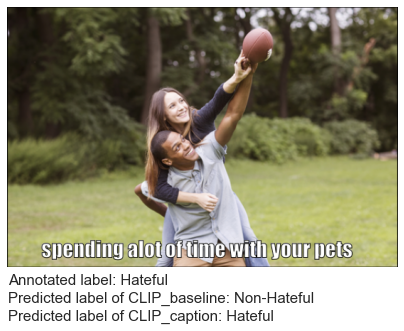

In [19]:
# display a True Positive cases identified by CLIP model with captioning features but not identified by CLIP baseline model
img = True_Positive_Comparison[15]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, 'Annotated label: Hateful', fontsize=15)
plt.text(0, image.size[1] + 50, 'Predicted label of CLIP_baseline: Non-Hateful', fontsize=15)
plt.text(0, image.size[1] + 75, 'Predicted label of CLIP_caption: Hateful', fontsize=15)
plt.imshow(image);

## Error Analysis of predicted results from ensemble model

In [20]:
CLIP_ensemble = pd.read_csv('CLIP_ensemble.csv')

# print AUROC score
roc_auc_score(test_seen['label'], norm(CLIP_ensemble['proba']))*100

83.23249299719888

### Confusion Matrix

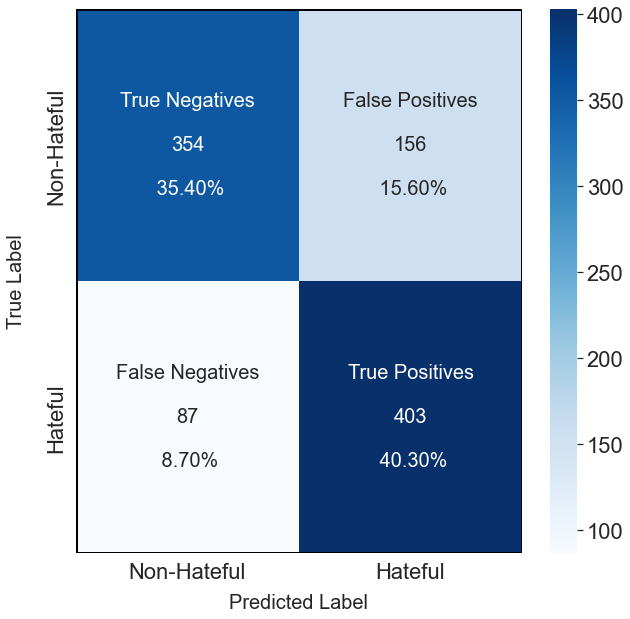

In [21]:
# plot confusion matrix
CLIP_ensemble_matrix = confusion_matrix(test_seen['label'], CLIP_ensemble['label'])
plot_confusion_matrix(CLIP_ensemble_matrix)

### False Positive cases

In [22]:
# save all False Positive caseson-Hateful meme prediced as Hateful)
False_Positive = test_seen['label'] != CLIP_ensemble['label']
False_Positive &= test_seen['label'] == 0
FP_CLIP_ensemble = test_seen[False_Positive].img.values
print(FP_CLIP_ensemble)

['img/49267.png' 'img/42635.png' 'img/63502.png' 'img/30954.png'
 'img/37092.png' 'img/76542.png' 'img/07652.png' 'img/07689.png'
 'img/29710.png' 'img/90538.png' 'img/06931.png' 'img/69403.png'
 'img/03146.png' 'img/04879.png' 'img/45326.png' 'img/09241.png'
 'img/31468.png' 'img/70456.png' 'img/48523.png' 'img/45093.png'
 'img/63719.png' 'img/98035.png' 'img/28579.png' 'img/45610.png'
 'img/91260.png' 'img/54621.png' 'img/95371.png' 'img/26549.png'
 'img/72364.png' 'img/58069.png' 'img/15438.png' 'img/86025.png'
 'img/96502.png' 'img/17845.png' 'img/13874.png' 'img/57312.png'
 'img/62790.png' 'img/45827.png' 'img/79861.png' 'img/03987.png'
 'img/80914.png' 'img/09687.png' 'img/21863.png' 'img/06329.png'
 'img/02751.png' 'img/75136.png' 'img/93481.png' 'img/90143.png'
 'img/79134.png' 'img/63795.png' 'img/42986.png' 'img/41896.png'
 'img/67951.png' 'img/04135.png' 'img/54830.png' 'img/92836.png'
 'img/64907.png' 'img/98473.png' 'img/57908.png' 'img/51628.png'
 'img/01459.png' 'img/938

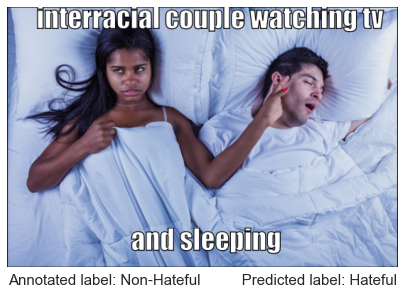

In [23]:
# display a False Positive cases (Non-Hateful meme prediced as Hateful)
img = FP_CLIP_ensemble[1]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0,image.size[1]+25, 'Annotated label: Non-Hateful' + '          Predicted label: Hateful', fontsize=15)
plt.imshow(image);

### False Negative cases

In [24]:
# save all False Negative cases (Hateful Meme predicted as Non-Hateful)
False_Negative = test_seen['label'] != CLIP_ensemble['label']
False_Negative &= test_seen['label'] == 1
FN_CLIP_ensemble = test_seen[False_Negative].img.values
print(FN_CLIP_ensemble)

['img/69421.png' 'img/93875.png' 'img/57286.png' 'img/08261.png'
 'img/86394.png' 'img/17546.png' 'img/56908.png' 'img/49372.png'
 'img/38701.png' 'img/12643.png' 'img/02789.png' 'img/07291.png'
 'img/78092.png' 'img/15473.png' 'img/30762.png' 'img/64735.png'
 'img/48132.png' 'img/10963.png' 'img/17096.png' 'img/39564.png'
 'img/80713.png' 'img/08524.png' 'img/07193.png' 'img/51482.png'
 'img/07396.png' 'img/05968.png' 'img/17852.png' 'img/95306.png'
 'img/65148.png' 'img/92837.png' 'img/57890.png' 'img/43269.png'
 'img/34291.png' 'img/84057.png' 'img/72419.png' 'img/80321.png'
 'img/28495.png' 'img/27548.png' 'img/42083.png' 'img/19740.png'
 'img/89140.png' 'img/37845.png' 'img/31875.png' 'img/87532.png'
 'img/92847.png' 'img/80246.png' 'img/92658.png' 'img/60794.png'
 'img/16473.png' 'img/27408.png' 'img/32560.png' 'img/34170.png'
 'img/89571.png' 'img/68172.png' 'img/69123.png' 'img/27659.png'
 'img/15489.png' 'img/49215.png' 'img/92015.png' 'img/18750.png'
 'img/23897.png' 'img/429

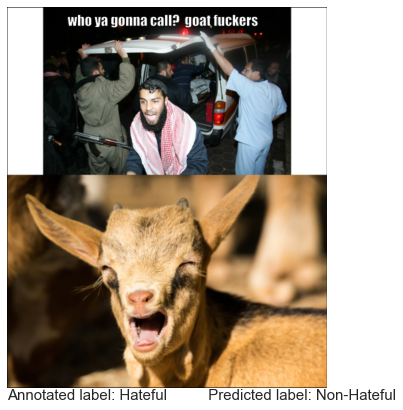

In [25]:
# display a False Negative case (Hateful Meme predicted as Non-Hateful)
img = FN_CLIP_ensemble[7]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0,image.size[1]+25, 'Annotated label: Hateful' + '          Predicted label: Non-Hateful', fontsize=15)
plt.imshow(image);

### Comparison: True Positive cases identified by ensemble model but not identified by CLIP model with captioning features

In [26]:
True_Positive = test_seen['label'] == CLIP_ensemble['label']
True_Positive &= test_seen['label'] == 1
True_Positive &= CLIP_caption['label'] == 0
True_Positive_Comparison = test_seen[True_Positive].img.values
print(True_Positive_Comparison)

['img/43728.png' 'img/27980.png' 'img/79316.png' 'img/26910.png'
 'img/03765.png' 'img/67350.png' 'img/94175.png']


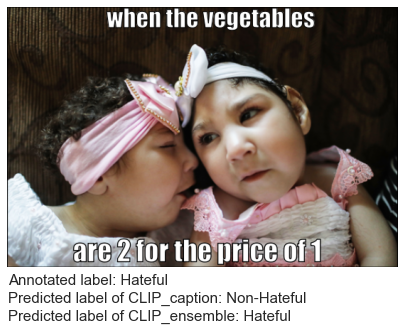

In [27]:
# display a True Positive cases identified by CLIP model with captioning features but not identified by CLIP baseline model
img = True_Positive_Comparison[1]
image = Image.open('../data/'+img)
plt.figure(figsize=(7,7))
plt.axis('off')
plt.rcParams["axes.grid"] = False
plt.text(0, image.size[1] + 25, 'Annotated label: Hateful', fontsize=15)
plt.text(0, image.size[1] + 50, 'Predicted label of CLIP_caption: Non-Hateful', fontsize=15)
plt.text(0, image.size[1] + 75, 'Predicted label of CLIP_ensemble: Hateful', fontsize=15)
plt.imshow(image);